In [1]:
import random as rd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

class Perceptron():
    

    """ 

    the random_state is used for the initialization of the weight (just for setting the seed)
    
    """
    def __init__(self,learning_rate=0.01,n_iter=50,random_state=0) -> None:
          self.learning_rate=learning_rate
          self.n_iter=n_iter
          self.random_state=random_state

    def fit(self,x_train,y_train):
         
         random_generator=np.random.RandomState(self.random_state)
         self.w_=random_generator.normal(
              loc=0.0,scale=0.01,size=x_train.shape[1]+1
         )

         self.errors=[]

         for _ in range(self.n_iter):
              errors=0
              for xi,target in zip(x_train,y_train):
                   update=self.learning_rate*(target-self.predict(xi))
                   self.w_[1:]+=update*xi
                   self.w_[0]=self.w_[0]+update
                   errors+=int(update != 0.0)
              self.errors.append(errors)
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def predict(self,x_train):
         
         return np.where(self.net_input(x_train) >= 0.0, 1, -1)


In [3]:
from sklearn.datasets import load_iris

iris_data=load_iris()

print(iris_data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

df[4].value_counts()

4
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
data=df.iloc[0:100]
data.drop([1,3],axis=1,inplace=True)
data

C:\Users\papew\AppData\Local\Temp\ipykernel_4492\304952208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop([1,3],axis=1,inplace=True)


,0,2,4
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa
...,...,...,...
95,5.7,4.2,Iris-versicolor
96,5.7,4.2,Iris-versicolor
97,6.2,4.3,Iris-versicolor
98,5.1,3.0,Iris-versicolor


In [6]:
target=np.where(data[4]=="Iris-setosa",1,-1)

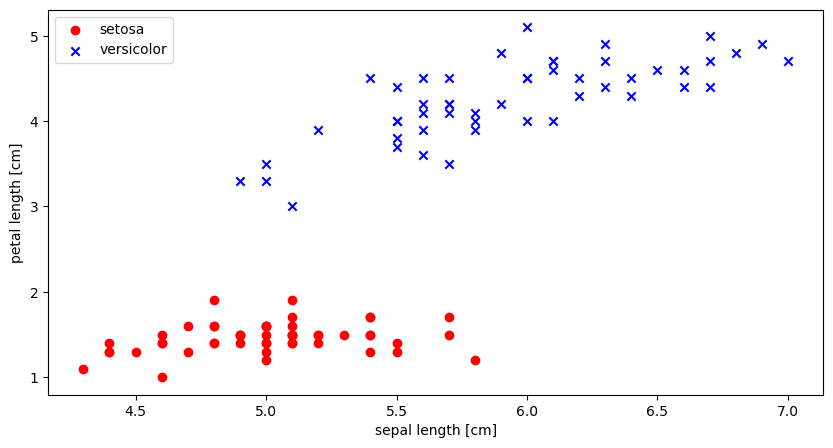

In [7]:
plt.figure(figsize=(10,5))

plt.scatter(data.iloc[:50,0],data.iloc[:50,1],color='red', marker='o', label='setosa')
plt.scatter(data.iloc[50:,0],data.iloc[50:,1],color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

<Axes: xlabel='0', ylabel='2'>

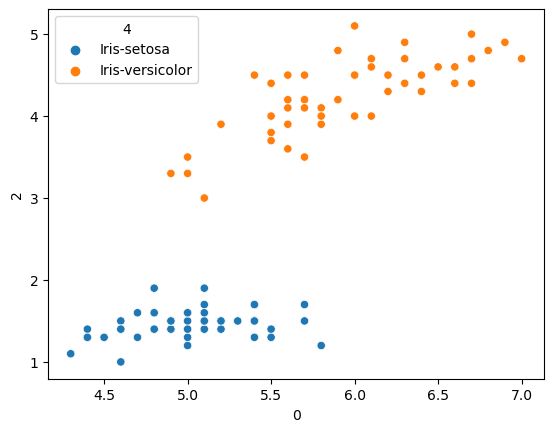

In [8]:
import seaborn as sns
sns.scatterplot(x=0,y=2,hue=4,data=data)

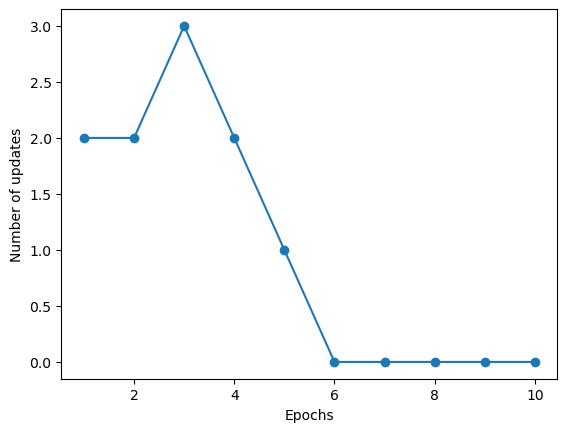

In [9]:
perceptron=Perceptron(0.1,10,24)

perceptron.fit(data[[0,2]].values,target)
plt.plot(range(1, len(perceptron.errors) + 1),perceptron.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [10]:
class adlin_classifier():

    def __init__(self,learning_rate=0.01,n_iter=50,random_state=24):
        self.learning_rate=learning_rate
        self.n_iter=n_iter
        self.random_state=random_state

    def fit(self,X_train,y_train):
        
          random_generator = np.random.RandomState(self.random_state)
          self.w_ = random_generator.normal(loc=0.0, scale=0.01, size=1 + X_train.shape[1])
          self.cost_ = []

          for i in range(self.n_iter):
               output0 = self.net_input(X_train)
               output = self.activation(output0)
               errors = y_train - output
               activation_derivative = 1  # Derivative of the identity activation function
               self.w_[1:] += self.learning_rate * X_train.T.dot(errors) * activation_derivative
               self.w_[0] += self.learning_rate * errors.sum()
               loss_error = (errors ** 2).sum() / 2
               self.cost_.append(loss_error)

          return self

        
    def net_input(self,X):

        return np.dot(X,self.w_[1:]) + self.w_[0]
   
    def activation(self,X):

        return X
    def predict(self, X):
           return np.where(self.activation(self.net_input(X))>= 0.0, 1, -1)

In [11]:
Agrneuron=adlin_classifier(0.1,10)
Agrneuron.fit(data[[0,2]].values,target)
Agrneuron.cost_

[49.275619246243046,
 142705.08391950675,
 22540444148.424465,
 3678874885767288.0,
 6.004494507542183e+20,
 9.800266620608565e+25,
 1.5995555615067188e+31,
 2.610722843975247e+36,
 4.261104729387401e+41,
 6.954784019570877e+46]

In [13]:
data[[0,2]].values.shape[1]

2

In [14]:
X_train=data[[0,2]].values
X_train[:,0]=(X_train[:,0]-X_train[:,0].mean())/X_train[:,0].std()
X_train[:,1]=(X_train[:,1]-X_train[:,1].mean())/X_train[:,1].std()
X_train

array([[-0.5810659 , -1.01435952],
       [-0.89430898, -1.01435952],
       [-1.20755205, -1.08374115],
       [-1.36417359, -0.94497788],
       [-0.73768744, -1.01435952],
       [-0.11120129, -0.80621461],
       [-1.36417359, -1.01435952],
       [-0.73768744, -0.94497788],
       [-1.67741667, -1.01435952],
       [-0.89430898, -0.94497788],
       [-0.11120129, -0.94497788],
       [-1.05093052, -0.87559625],
       [-1.05093052, -1.01435952],
       [-1.8340382 , -1.22250442],
       [ 0.51528486, -1.15312279],
       [ 0.35866332, -0.94497788],
       [-0.11120129, -1.08374115],
       [-0.5810659 , -1.01435952],
       [ 0.35866332, -0.80621461],
       [-0.5810659 , -0.94497788],
       [-0.11120129, -0.80621461],
       [-0.5810659 , -0.94497788],
       [-1.36417359, -1.29188606],
       [-0.5810659 , -0.80621461],
       [-1.05093052, -0.66745134],
       [-0.73768744, -0.87559625],
       [-0.73768744, -0.87559625],
       [-0.42444437, -0.94497788],
       [-0.42444437,

In [15]:
ag2=adlin_classifier(0.01,15)
ag2.fit(X_train,target)
ag2.cost_

[49.146691915113735,
 33.257912911793824,
 22.77752659192155,
 15.860720673278868,
 11.295793135688502,
 8.283049440323953,
 6.294710195239249,
 4.982453543726906,
 4.116395337766669,
 3.544817502556887,
 3.167589714107177,
 2.918628338048168,
 2.754319746085942,
 2.6458799799665176,
 2.574312311254835]

## Adaline single layer with stochastic gradient descent

In [25]:
class adaline_sgd():

    def __init__(self,learning_rate=0.01,n_iter=50,random_state=42,shuffle=True):
        self.w_initialized = False
        self.learning_rate=learning_rate
        self.n_iter=n_iter
        self.random_state=random_state
        self.shuffle=shuffle

    def _initialize_weights(self,shape):
          self.rgen = np.random.RandomState(self.random_state)
          self.w_ = self.rgen.normal(loc=0.0, scale=0.01,size=1 + shape)
          self.w_initialized=True
        
    def _shuffle(self,X,y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
        
    def fit(self,X_train,y_train):
       self._initialize_weights(X.shape[1])
       self.cost_ = []
       for i in range(self.n_iter):
            if self.shuffle:
                 X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                 cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
       return self
        
    def partial_fit(self,X_train,y_train):
        """ fit the training data without reinitializig the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
             for xi, target in zip(X, y):
                 self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _update_weights(self, xi, target):
        output=self.activation(self.net_input(xi))
        error=target-output
        self.w_[1:]+= self.learning_rate*xi.dot(error)
        self.w_[0] += self.eta * error
        cost=0.5*error**2
        return cost

    def net_input(self, X):
            """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0

    def activation(self, X):
           """Compute linear activation"""
        return X

    def predict(self, X):
           """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X))>= 0.0, 1, -1)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 53)

In [26]:
class LogisticRegression():

    def __init__(self,learning_rate=0.01,epoch=50,random_state=42):

        self.learning_rate=learning_rate
        self.epoch=epoch
        self.random_state=random_state

    def fit(self,X_train,y_train):

        random_gen=np.random.RandomState(self.random_state)
        self.w_= self.w_ = self.rgen.normal(loc=0.0, scale=0.01,size=1 + X_train.shape[1])
        self.cost_=[]

        for i in range(self.epoch):
            output=self.activation(self.net_input(X_train))
            errors=y_train-output
            w_[1:]+=self.learning_rate * X_train.T.dot(errors)
            w_[0]+=self.learning_rate * errors.sum()

    def net_input(self,X_train):

        return np.dot(w_[1:],X_train) + w_[0]

    def activation(self,X):

        return 1/(1-np.exp(-X))

    def predict(X):

        return np.where(self.activation(self,net_input(X))>=0.5,1,0)

In [27]:
class MLP():

     """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_hidden : int (default: 30)
        Number of hidden units.
    l2 : float (default: 0.)
        Lambda value for L2-regularization.
        No regularization if l2=0. (default)
    epochs : int (default: 100)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent circles.
    minibatch_size : int (default: 1)
        Number of training samples per minibatch.
    seed : int (default: None)
        Random seed for initalizing weights and shuffling.

    Attributes
    -----------
    eval_ : dict
      Dictionary collecting the cost, training accuracy,
      and validation accuracy for each epoch during training.

    """
    def __init__(self, n_hidden=30,
                 l2=0., epochs=100, eta=0.001,
                 shuffle=True, minibatch_size=1, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_samples]
            Target values.

        Returns
        -----------
        onehot : array, shape = (n_samples, n_labels)

        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def _forward(self, X):
        """Compute forward propagation step"""

        # step 1: net input of hidden layer
        # [n_samples, n_features] dot [n_features, n_hidden]
        # -> [n_samples, n_hidden]
        z_h = np.dot(X, self.w_h) + self.b_h

        # step 2: activation of hidden layer
        a_h = self._sigmoid(z_h)

        # step 3: net input of output layer
        # [n_samples, n_hidden] dot [n_hidden, n_classlabels]
        # -> [n_samples, n_classlabels]

        z_out = np.dot(a_h, self.w_out) + self.b_out

        # step 4: activation output layer
        a_out = self._sigmoid(z_out)

        return z_h, a_h, z_out, a_out

    def _compute_cost(self, y_enc, output):
        """Compute cost function.

        Parameters
        ----------
        y_enc : array, shape = (n_samples, n_labels)
            one-hot encoded class labels.
        output : array, shape = [n_samples, n_output_units]
            Activation of the output layer (forward propagation)

        Returns
        ---------
        cost : float
            Regularized cost

        """
        L2_term = (self.l2 *
                   (np.sum(self.w_h ** 2.) +
                    np.sum(self.w_out ** 2.)))

        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term

        # If you are applying this cost function to other
        # datasets where activation
        # values maybe become more extreme (closer to zero or 1)
        # you may encounter "ZeroDivisionError"s due to numerical
        # instabilities in Python & NumPy for the current implementation.
        # I.e., the code tries to evaluate log(0), which is undefined.
        # To address this issue, you could add a small constant to the
        # activation values that are passed to the log function.
        #
        # For example:
        #
        # term1 = -y_enc * (np.log(output + 1e-5))
        # term2 = (1. - y_enc) * np.log(1. - output + 1e-5)

        return cost

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
            Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_samples]
            Predicted class labels.

        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        """ Learn weights from training data.

        Parameters
        -----------
        X_train : array, shape = [n_samples, n_features]
            Input layer with original features.
        y_train : array, shape = [n_samples]
            Target class labels.
        X_valid : array, shape = [n_samples, n_features]
            Sample features for validation during training
        y_valid : array, shape = [n_samples]
            Sample labels for validation during training

        Returns:
        ----------
        self

        """
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]

        ########################
        # Weight initialization
        ########################

        # weights for input -> hidden
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1,
                                      size=(n_features, self.n_hidden))

        # weights for hidden -> output
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1,
                                        size=(self.n_hidden, n_output))

        epoch_strlen = len(str(self.epochs))  # for progress formatting
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # iterate over training epochs
        for i in range(self.epochs):

            # iterate over minibatches
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size +
                                   1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # forward propagation
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])

                ##################
                # Backpropagation
                ##################

                # [n_samples, n_classlabels]
                sigma_out = a_out - y_train_enc[batch_idx]

                # [n_samples, n_hidden]
                sigmoid_derivative_h = a_h * (1. - a_h)

                # [n_samples, n_classlabels] dot [n_classlabels, n_hidden]
                # -> [n_samples, n_hidden]
                sigma_h = (np.dot(sigma_out, self.w_out.T) *
                           sigmoid_derivative_h)

                # [n_features, n_samples] dot [n_samples, n_hidden]
                # -> [n_features, n_hidden]
                grad_w_h = np.dot(X_train[batch_idx].T, sigma_h)
                grad_b_h = np.sum(sigma_h, axis=0)

                # [n_hidden, n_samples] dot [n_samples, n_classlabels]
                # -> [n_hidden, n_classlabels]
                grad_w_out = np.dot(a_h.T, sigma_out)
                grad_b_out = np.sum(sigma_out, axis=0)

                # Regularization and weight updates
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h  # bias is not regularized
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h

                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out  # bias is not regularized
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out

            #############
            # Evaluation
            #############

            # Evaluation after each epoch during training
            z_h, a_h, z_out, a_out = self._forward(X_train)
            cost = self._compute_cost(y_enc=y_train_enc,
                                      output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)

            train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) /
                         X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) /
                         X_valid.shape[0])

            sys.stderr.write('\r%0*d/%d | Cost: %.2f '
                             '| Train/Valid Acc.: %.2f%%/%.2f%% ' %
                             (epoch_strlen, i+1, self.epochs, cost,
                              train_acc*100, valid_acc*100))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)

        return self



IndentationError: expected an indented block after function definition on line 27 (4113701335.py, line 28)

In [31]:
def onehot(target):
     onehot=np.zeros((3,target.shape[0]))
     for index,val in enumerate(target.astype(int)):
            onehot[val,index]=1
     return onehot.T

onehot(np.array([1,0,0,0,2]))

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [33]:
np.argmax(np.array([[0.5,0.8,0.9],[0.1,0.2,0.9]]),axis=1)

array([2, 2], dtype=int64)